In [4]:
import tensorflow 
import numpy 
import scipy
import tensorflow as tf
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.python.keras.datasets import mnist 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import os
numpy.random.seed(42)

(train_pic_data, train_answers), (test_pic_data, test_answers) = mnist.load_data()
ir, ic = 28, 28 
input_shape = (ir, ic, 1)
train_pic_data = train_pic_data.reshape(train_pic_data.shape[0], ir, ic, 1) 
test_pic_data = test_pic_data.reshape(test_pic_data.shape[0], ir, ic, 1)
# convert from int to float
train_pic_data = train_pic_data.astype('float32')
test_pic_data = test_pic_data.astype('float32')
train_pic_data /= 255
test_pic_data /= 255
train_pic_answers = tf.keras.utils.to_categorical(train_answers, 10) #преобразуем в метки наши ответы
test_pic_answers = tf.keras.utils.to_categorical(test_answers, 10)
model = Sequential()
model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 75)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 75)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5400500   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
Total params: 5,407,460
Trainable params: 5,407,460
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model.fit(train_pic_data, train_pic_answers, validation_data=(test_pic_data, test_pic_answers), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 176s - loss: 0.0048 - acc: 0.9984 - val_loss: 0.0409 - val_acc: 0.9897
Epoch 2/10
 - 175s - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0391 - val_acc: 0.9901
Epoch 3/10
 - 175s - loss: 0.0046 - acc: 0.9986 - val_loss: 0.0390 - val_acc: 0.9901
Epoch 4/10
 - 176s - loss: 0.0046 - acc: 0.9985 - val_loss: 0.0449 - val_acc: 0.9887
Epoch 5/10
 - 176s - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0371 - val_acc: 0.9904
Epoch 6/10
 - 177s - loss: 0.0042 - acc: 0.9987 - val_loss: 0.0416 - val_acc: 0.9896
Epoch 7/10
 - 183s - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0414 - val_acc: 0.9902
Epoch 8/10
 - 178s - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0368 - val_acc: 0.9911
Epoch 9/10
 - 178s - loss: 0.0029 - acc: 0.9992 - val_loss: 0.0349 - val_acc: 0.9913
Epoch 10/10
 - 179s - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0463 - val_acc: 0.9890


In [17]:
scores = model.evaluate(test_pic_data, test_pic_answers, verbose=0)
print("CNN accuracy: %.2f%%" % (scores[1]*100))

CNN accuracy: 98.90%


In [18]:
save_json = model.to_json()
file_json = open("model_CNN2.json", "w")
file_json.write(save_json)
file_json.close()
tf.keras.models.save_model(model,"model_CNN2.h5")

In [34]:
print(history.history.keys())
print(history.history['acc'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.998416668176651, 0.9978666687011719, 0.9985666680335998, 0.9984666681289673, 0.9990833342075348, 0.9987333345413208, 0.9986333346366882, 0.9990666675567627, 0.9991500008106232, 0.9990166676044464]


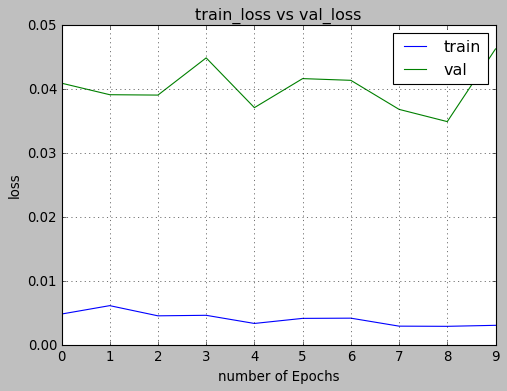

In [29]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import History


train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(10)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('number of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])




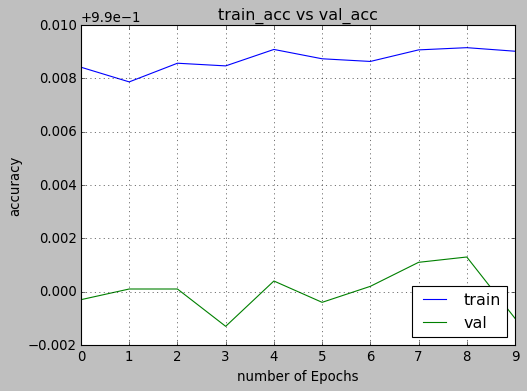

In [30]:

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('number of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
Y_pred = model.predict(test_pic_data)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

target_names = ['0', '1', '2','3','4','5','6','7','8','9']
print(classification_report(np.argmax(test_pic_answers,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(test_pic_answers,axis=1), y_pred))

[[6.92399724e-16 1.00509406e-15 5.54873020e-16 ... 1.00000000e+00
  1.28730024e-17 2.02282395e-15]
 [1.58580532e-18 1.04377151e-12 1.00000000e+00 ... 3.06374269e-21
  1.78643055e-22 1.64730628e-23]
 [5.22492570e-11 1.00000000e+00 1.99851979e-09 ... 1.56973456e-08
  2.99056402e-09 1.44778503e-12]
 ...
 [5.43138319e-19 1.67895385e-12 3.93520721e-17 ... 5.33487282e-11
  1.76866988e-09 1.35537193e-10]
 [1.65416350e-16 2.78487918e-22 6.74729204e-23 ... 3.39952650e-16
  2.60019653e-12 5.63814422e-19]
 [6.62213665e-13 1.37746891e-15 4.87768370e-16 ... 9.56742277e-26
  1.97747431e-14 4.08140073e-16]]
[7 2 1 ... 4 5 6]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       1.00      1.00      1.00      1135
          2       0.98      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       1.00      0.98      0.99       982
          5       0.99      0.99      0.99       892
          